    Sentiment Analysis : 

In [1]:
#import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from textblob import TextBlob

In [2]:
import nltk
from nltk.tokenize import word_tokenize #nltk.download('punkt')  #use this once if not working.
from stop_words import get_stop_words
stop_words = get_stop_words('english')

import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata

from wordcloud import WordCloud       #for wordcloud
import matplotlib.pyplot as plt

In [3]:
path= "E:/My Learning/04-Machine Learning/04_AI_Genei_Training/Capstone_NLP/Twitter_Analysis/"
data = pd.read_csv(path+"twitter_data.csv")

    starting Text-Preprocessing functions: 

In [4]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def rem_stop_words(input_list):
    y=[]
    for text in input_list:
        if text not in stop_words:
            y.append(text)
    return y

def get_polarity(string):
    return TextBlob(string).sentiment.polarity

In [5]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

    Applying Text Preprocessing: 

In [6]:
data['Text'] = data['Text'].map(remove_accented_chars)   #removing Accented chars
data['Text'] = data['Text'].map(expand_contractions)     #removing contractions
data['Text'] = data['Text'].map(remove_special_characters)   #removing special Characters.              

In [7]:
data['polarity'] = data.Text.map(get_polarity)            # getting polarity of all twittes.

In [8]:
data['Text'] = data.Text.map(word_tokenize)                 #sentence to words (Tokenizing)
data['Text'] = data.Text.map(rem_stop_words)                #remove stop words  (Stop Words.)

In [9]:
data.to_csv(path+"output.csv",index=False)   # Saving file with polarity columns for each row. 

    Generating word cloud for +ve, -ve and neutral words.

In [10]:
#getting All text in one variable: 
text = []
for t in data['Text']:
    for t1 in t:
        text.append(t1)
text = set(text)

In [11]:
# seperating +ve, -ve and Neutral words.
positive = []
negative = []
neutral = []
for t in text:
    if(get_polarity(t)>0.1):
        positive.append(t)
    elif(get_polarity(t)<0.1 and get_polarity(t)>-0.1):
        neutral.append(t)
    else:
        negative.append(t)    

Positive Word Cloud: 
 ['bright', 'brave', 'trendy', 'concrete', 'safe', 'rose', 'POSITIVE', 'excellent', 'Gripping', 'grand', 'familiar', 'Fast', 'Purely', 'better', 'attractive'] ...


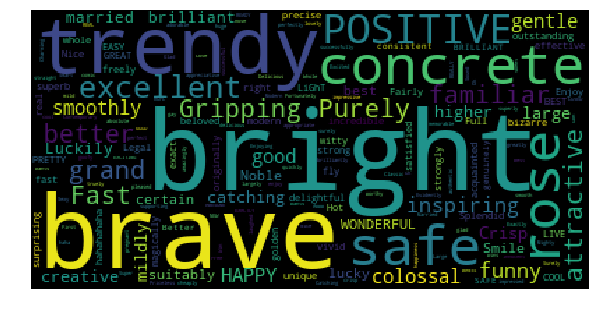

Negative Word Cloud: 
 ['Secret', 'poor', 'missing', 'bad', 'average', 'Failure', 'WAN', 'muggy', 'HORRIBLE', 'complete', 'complicated', 'everyday', 'FATTY', 'ruins', 'rank'] ...


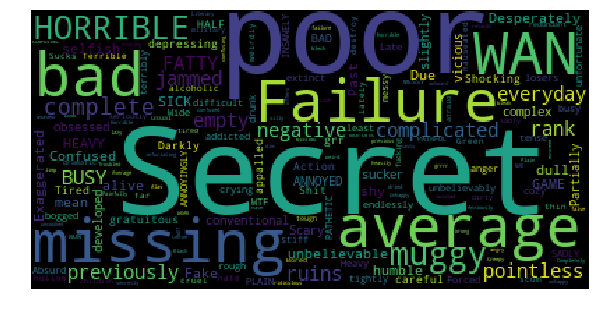

Neutral Word Cloud: 
 ['BioProfile', 'rel', 'crazyyy', 'Taikang', 'holmpat', 'drivetop', 'PIM', 'MagicBartender', 'coming', 'bolts', 'ikimb0', 'Retrievers', 'corp', 'replacing', 'cope'] ...


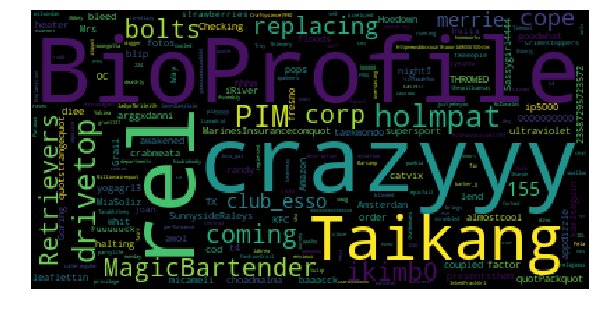

In [12]:
#Final Printing all word cloud for +ve, -ve and neutral.
print("Positive Word Cloud: \n",positive[0:15],"...")
fig, ax = plt.subplots(figsize=(10, 6))
wordcloud = WordCloud().generate_from_frequencies(nltk.FreqDist(positive))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Negative Word Cloud: \n",negative[0:15],"...")
fig, ax = plt.subplots(figsize=(10, 6))
wordcloud = WordCloud().generate_from_frequencies(nltk.FreqDist(negative))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Neutral Word Cloud: \n",neutral[0:15],"...")
fig, ax = plt.subplots(figsize=(10, 6))
wordcloud = WordCloud().generate_from_frequencies(nltk.FreqDist(neutral))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()